In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [15]:
def strassen_multiply(matrix1, matrix2):
    size1 = matrix1.shape[0]
    size2 = matrix2.shape[0]

    # Case 1: Matrix dimensions are powers of 2
    if (size1 & (size1 - 1) == 0) and (size2 & (size2 - 1) == 0):
        return strassen_multiply_power_of_2(matrix1, matrix2)

    # Case 2: Matrix dimensions are not powers of 2
    return strassen_multiply_non_power_of_2(matrix1, matrix2)

def strassen_multiply_power_of_2(matrix1, matrix2):
  size = matrix1.shape[0]

    # Base case: if matrices are 1x1, perform standard multiplication
  if size == 1:
    return matrix1 * matrix2

    # Split matrices into quadrants
  half_size = size // 2
  a11 = matrix1[:half_size, :half_size]
  a12 = matrix1[:half_size, half_size:]
  a21 = matrix1[half_size:, :half_size]
  a22 = matrix1[half_size:, half_size:]

  b11 = matrix2[:half_size, :half_size]
  b12 = matrix2[:half_size, half_size:]
  b21 = matrix2[half_size:, :half_size]
  b22 = matrix2[half_size:, half_size:]

    # Recursively compute products of submatrices
  p1 = strassen_multiply(a11 + a22, b11 + b22)
  p2 = strassen_multiply(a21 + a22, b11)
  p3 = strassen_multiply(a11, b12 - b22)
  p4 = strassen_multiply(a22, b21 - b11)
  p5 = strassen_multiply(a11 + a12, b22)
  p6 = strassen_multiply(a21 - a11, b11 + b12)
  p7 = strassen_multiply(a12 - a22, b21 + b22)

    # Compute submatrices of the result
  c11 = p1 + p4 - p5 + p7
  c12 = p3 + p5
  c21 = p2 + p4
  c22 = p1 + p3 - p2 + p6

    # Combine submatrices into the result matrix
  result = np.zeros((size, size))
  result[:half_size, :half_size] = c11
  result[:half_size, half_size:] = c12
  result[half_size:, :half_size] = c21
  result[half_size:, half_size:] = c22

  return result

def strassen_multiply_non_power_of_2(matrix1, matrix2):
  size1 = matrix1.shape[0]
  size2 = matrix2.shape[0]

    # Find the nearest power of 2 for each matrix
  new_size1 = 2 ** int(np.ceil(np.log2(size1)))
  new_size2 = 2 ** int(np.ceil(np.log2(size2)))

    # Pad matrices to the nearest power of 2
  padded_matrix1 = np.zeros((new_size1, new_size1))
  padded_matrix2 = np.zeros((new_size2, new_size2))
  padded_matrix1[:size1, :size1] = matrix1
  padded_matrix2[:size2, :size2] = matrix2

    # Apply Strassen's algorithm on padded matrices
  padded_result = strassen_multiply_power_of_2(padded_matrix1, padded_matrix2)

    # Remove the extra rows and columns to get the actual result
  result = padded_result[:size1, :size2]

  return result

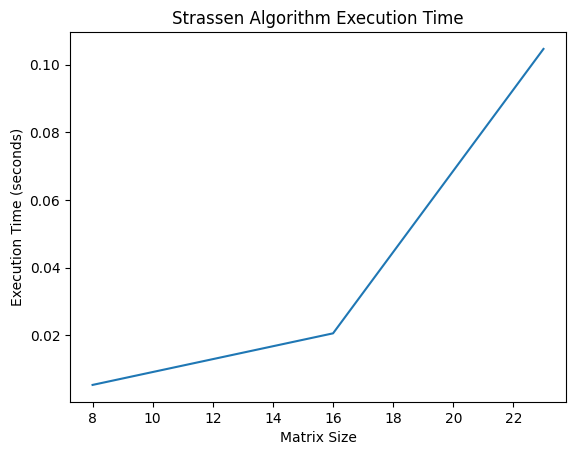

In [16]:
sizes = [8, 16, 23]

# List to store execution times
execution_times = []

# Perform matrix multiplication for different sizes and measure execution times
for size in sizes:
    matrix = np.random.rand(size, size)

    # Calculate execution time for the relevant function based on matrix size
    start_time = time.time()
    result = strassen_multiply(matrix, matrix)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot the execution times
plt.plot(sizes, execution_times)
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Strassen Algorithm Execution Time')
plt.show()